In [2]:
pip install pandas-datareader

     ------------------------------------ 109.5/109.5 kB 147.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install --upgrade pip


     ---------------------------------------- 2.1/2.1 MB 130.0 kB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0
    Uninstalling pip-23.0:
      Successfully uninstalled pip-23.0
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas_datareader as pdr

In [8]:
df=pdr.get_data_tiingo('AAPL',api_key='39663cd1343e5a5ad87bedf2da12a4c9bec435ce')

In [9]:
df.to_csv('AAPL.csv')

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv('AAPL.csv')

In [14]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-03-02 00:00:00+00:00,176.21,176.30,172.45,172.80,38453950,41.939318,41.960739,41.044409,41.127712,153815800,0.0,1.0
1,AAPL,2018-03-05 00:00:00+00:00,176.82,177.74,174.52,175.21,28401366,42.084503,42.303470,41.537085,41.701310,113605464,0.0,1.0
2,AAPL,2018-03-06 00:00:00+00:00,176.67,178.25,176.13,177.91,23788506,42.048801,42.424853,41.920277,42.343931,95154024,0.0,1.0
3,AAPL,2018-03-07 00:00:00+00:00,175.03,175.85,174.27,174.94,31703462,41.658469,41.853635,41.477583,41.637048,126813848,0.0,1.0
4,AAPL,2018-03-08 00:00:00+00:00,176.94,177.12,175.07,175.48,23163767,42.113063,42.155905,41.667989,41.765572,92655068,0.0,1.0


In [15]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-02-22 00:00:00+00:00,148.91,149.95,147.1600,148.87,51011305,148.91,149.95,147.1600,148.87,51011305,0.0,1.0
1253,AAPL,2023-02-23 00:00:00+00:00,149.40,150.34,147.2400,150.09,48394249,149.40,150.34,147.2400,150.09,48394249,0.0,1.0
1254,AAPL,2023-02-24 00:00:00+00:00,146.71,147.19,145.7202,147.11,55469606,146.71,147.19,145.7202,147.11,55469606,0.0,1.0
1255,AAPL,2023-02-27 00:00:00+00:00,147.92,149.17,147.4500,147.71,44998470,147.92,149.17,147.4500,147.71,44998470,0.0,1.0
1256,AAPL,2023-02-28 00:00:00+00:00,147.41,149.08,146.8300,147.05,50546998,147.41,149.08,146.8300,147.05,50546998,0.0,1.0


In [18]:
df1=df.reset_index()['close']

In [19]:
df1

0       176.21
1       176.82
2       176.67
3       175.03
4       176.94
         ...  
1252    148.91
1253    149.40
1254    146.71
1255    147.92
1256    147.41
Name: close, Length: 1257, dtype: float64

In [20]:
df1.shape

(1257,)

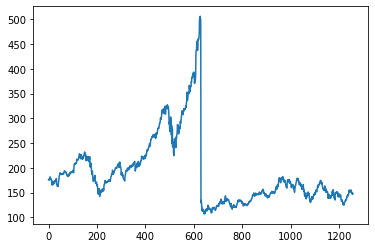

In [22]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [23]:
import numpy as np

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
df1

array([[0.17375078],
       [0.17527865],
       [0.17490294],
       ...,
       [0.09986224],
       [0.10289292],
       [0.10161553]])

In [27]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(817, 440)

In [29]:
import numpy as np

In [34]:
def create_dataset(dataset,time_step=1):
    dataX,dataY =[],[]
    for i in range (len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)    

In [35]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)


In [36]:
print(X_train)

[[0.17375078 0.17527865 0.17490294 ... 0.21189731 0.21232311 0.21580463]
 [0.17527865 0.17490294 0.17079524 ... 0.21232311 0.21580463 0.22036318]
 [0.17490294 0.17079524 0.17557921 ... 0.21580463 0.22036318 0.21883532]
 ...
 [0.06732624 0.0647464  0.056531   ... 0.05127113 0.0465623  0.05074515]
 [0.0647464  0.056531   0.06053851 ... 0.0465623  0.05074515 0.05024421]
 [0.056531   0.06053851 0.0494928  ... 0.05074515 0.05024421 0.05011897]]


In [37]:
print(X_test.shape),print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [39]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [43]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 200ms/step - loss: 0.0447 - val_loss: 7.3739e-04
Epoch 2/100
12/12 [==============================] - 2s 122ms/step - loss: 0.0226 - val_loss: 0.0093
Epoch 3/100
12/12 [==============================] - 2s 127ms/step - loss: 0.0125 - val_loss: 6.1273e-04
Epoch 4/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0100 - val_loss: 4.2863e-04
Epoch 5/100
12/12 [==============================] - 1s 119ms/step - loss: 0.0090 - val_loss: 4.1852e-04
Epoch 6/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 7/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0074 - val_loss: 4.0709e-04
Epoch 8/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0073 - val_loss: 9.1952e-04
Epoch 9/100
12/12 [==============================] - 1s 119ms/step - loss: 0.0072 - val_loss: 6.5802e-04
Epoch 10/100
12/12 [==============================] - 1s 121ms/

In [48]:
import tensorflow as tf

In [50]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 22ms/step


In [51]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [52]:
import math

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
math.sqrt(mean_squared_error(y_train,train_predict))

225.45664868806708

In [55]:
math.sqrt(mean_squared_error(y_test,test_predict))

154.64369511579616

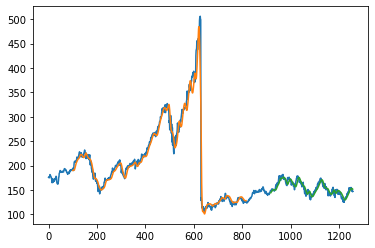

In [58]:
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [59]:
len(test_data)

440

In [62]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [64]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [65]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.10907441]
101
1 day input [0.09665623 0.08328115 0.0841077  0.08050094 0.07889793 0.09054477
 0.07899812 0.08909205 0.09244834 0.09272386 0.09154665 0.10126487
 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965 0.11646838
 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066 0.08180338
 0.07020664 0.10026299 0.10735128 0.10379461 0.10820288 0.10507201
 0.10990607 0.11133375 0.10311835 0.10855354 0.11078272 0.10336882
 0.09362555 0.08598622 0.10316844 0.10386976 0.10261741 0.09966187
 0.0903444  0.08541014 0.08969317 0.08846587 0.09430182 0.09675642
 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957 0.07165936
 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193 0.05783344
 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447 0.05983719
 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823 0.07120852
 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433 0.09790858
 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383 0.11243582
 0.11974953 0.11291171 0.11028178

12 day input [0.10126487 0.10672511 0.11396368 0.10647464 0.09507827 0.12247965
 0.11646838 0.10973075 0.09565435 0.08025047 0.07899812 0.08035066
 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461 0.10820288
 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354 0.11078272
 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976 0.10261741
 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587 0.09430182
 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449  0.06376957
 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017 0.05703193
 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698 0.05838447
 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823
 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.10

23 day input [0.08035066 0.08180338 0.07020664 0.10026299 0.10735128 0.10379461
 0.10820288 0.10507201 0.10990607 0.11133375 0.10311835 0.10855354
 0.11078272 0.10336882 0.09362555 0.08598622 0.10316844 0.10386976
 0.10261741 0.09966187 0.0903444  0.08541014 0.08969317 0.08846587
 0.09430182 0.09675642 0.0910958  0.07428929 0.06930495 0.0639449
 0.06376957 0.07165936 0.06359424 0.0626675  0.05808391 0.04809017
 0.05703193 0.05783344 0.04566061 0.04889167 0.04553538 0.05705698
 0.05838447 0.05983719 0.06675016 0.06654978 0.06993112 0.07288666
 0.07105823 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446
 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654
 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244
 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555
 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553 0.10907441
 0.10753162 0.10639425 0.10559522 0.1050486  0.1046827  0.10444571
 0.10430214 0.10422753 0.10420445 0.10421976 0.104

In [66]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [67]:
import matplotlib.pyplot as plt

In [69]:
len(df1)

1257

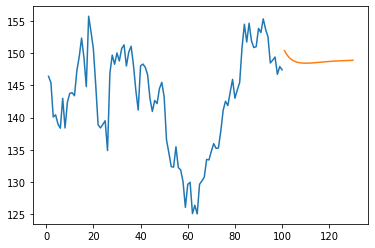

In [70]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

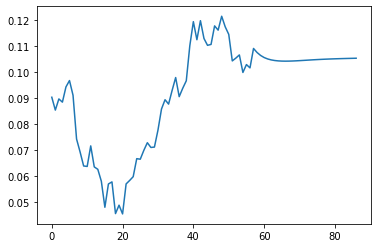

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [74]:
df3=scaler.inverse_transform(df3).tolist()

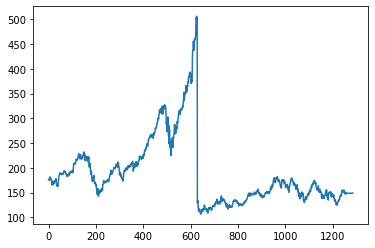

In [75]:
plt.plot(df3)